#### Quantum Data Science 23/24

# Lecture 4 - Support Vector Machines



### Table of Contents

1. [Margins: Intuition](#margins_intuition)
2. [Optimal margin classifier and primal formulation](#optimal_margin_classifier)
3. [Dual formulation](#dual_formulation)
4. [Kernel trick](#kernel_trick)
5. [Support vector classifier with Scikit-learn](#building_nn)
6. [Hands-On Exercises](#hands_on_exercise_1)




## 1. Margins: Intuition <a id='margins_intuition'></a>

*Support vector machines (SVMs)* are a powerful class of supervised learning algorithms (even today believed by some to be the best off the shelf supervised learning algorithm) for classification and regression problems. In this lecture, we will focus on the binary classification problem. The main idea behind SVMs is to find the hyperplane that best separates the data into different classes. 

Why hyperplanes ? From the *Occam’s razor principle*, hypothesis sets with smaller complexity provide better learning guarantees. A natural hypothesis set with relatively small complexity is that of *linear classifiers*, or hyperplanes.

$$ \mathcal{H} = \{x \mapsto sign(w^T x + b) : x \in \mathbb{R}^M, w \in \mathbb{R}^M, b \in \mathbb{R} \}$$ 


which is other way of saying what we had in our percetron algorithm with the heaviside step function.

General equation of the hyperplane $w^T x + b=0$. Consider labels $y \in \{-1,1\}$.

The sign operator returns the sign of the operation inside the brackets. Thus, the hypothesis labels positively all points falling on one side of the hyperplane and negatively all others (Figure below left)

<p align="center">
 <img width="1000" height="450" src="images/margins.png">
</p>

Which hyperplane should we choose from the infinite number of possible hyperplanes? We don't know yet, but one thing we can agree is that the points the further away from the hyperplane, the more confident we are about their classification right ? In the figure in the middle we notice that we need a very small change in the green hyperplane to misclassify a datapoint. Therefore, a good hyperplane would be one that has a large margin between points of different classes. This is the intuition behind SVMs and the reason why they are called *maximum margin classifiers* (illustrated in the figure on the right).

#### 2. Optimal margins and primal formulation <a id='optimal_margins'></a>



Notice that the greater $\gamma = y_i (w \cdot x_i + b)$ is, the more confident we are about the classification made! But notice as well that if we multiply $2\gamma$ the result stays the same , is does not change the label. Only the sign matters - $\gamma$ is called the *functional margin*. By simply scaling $w$ one can change the functional margin without altering the geometry of the decision boundary.

<p align="center">
    <img width="900" height="440" src="images/geometric_margins.png">
</p>

Therefore, we reach the optimization problem: 

<p align="center">
    <img width="1000" height="100" src="images/original_problem_svm.png">
</p>

Maximizing the margin is not straightforward, because of the normalization term $||w||$ that makes the problem non-convex. However the maximization is the same as minimizing $\frac{1}{2}||w||^2$ which is a convex optimization problem. The choice of $\frac{1}{2}$ simplifies the derivative calculations in the optimization process, and the optimization problem becomes:

<image align="center">
    <img width="800" height="100" src="images/minimization_svm.png">
</p>

The problem can even be further simplified using Lagrange multipliers that turn the constrined optimization problem into an unconstrained one:

$$
\begin{equation*}
L(w,b,\alpha) = \frac{1}{2}||w||^2 - \sum_{i=0}^{M-1} \alpha_i (y_i(w \cdot x_i + b) - 1)
\end{equation*}

### 3. Dual formulation <a id='dual_formulation'></a>

However, notice that we are trying to optimize a function in which the weights $w$ are $N$ dimensional with $N$ being the number of features. This is a problem because the optimization problem becomes computationally expensive as the number of features increases. 

The dual formulation removes the dependence on the weights $w$ be noticing that the optimal weights can be expressed as a linear combination of the training data points if we set the derivatives to zero (convex problem -> KKT conditions), simplifying the problem to: 

$$
\begin{equation*}
L(\alpha) = \sum_{i=0}^{M-1} \alpha_i - \frac{1}{2} \sum_{i=0}^{M-1} \sum_{j=0}^{M-1} \alpha_i \alpha_j y_i y_j x_i \cdot x_j
\end{equation*}
$$

subject to the constraints $\alpha_i \geq 0$ and $\sum_{i=0}^{M-1} \alpha_i y_i = 0$. 

Thus, we optimize for as many parameters as the number of training data points, which is computationally more efficient, and after the optimization only support vectors will have non-zero $\alpha_i$ values.

### 4. Kernel trick <a id='dual_formulation'></a>

Recall that the SVM is a linear model , thus it cannot classify non-linear data. However, we can use the kernel trick to map the data into a higher dimensional space where it is linearly separable, by replacing the dot product $x_i \cdot x_j$ with a dot product in a feature space of higher dimensionality, where the data is linearly separable by a hyperplane.

<image align="center">
    <img width="1000" height="500" src="images/kernel_trick.png">
</p>



We replace the inner product with an inner product in a higher dimensional space:

$$
\begin{equation*}
L(\alpha) = \sum_{i=0}^{M-1} \alpha_i - \frac{1}{2} \sum_{i=0}^{M-1} \sum_{j=0}^{M-1} \alpha_i \alpha_j y_i y_j k(x_i,x_j)
\end{equation*}
$$

where 
$$k(x_i,x_j) = \langle \phi(x_i) \cdot \phi(x_j) \rangle$$ 

is the kernel function.

### 5. Support vector classifier with Scikit-learn <a id='building_nn'></a>

We will now use the `SVC` class from the `sklearn.svm` module to build a support vector classifier.  Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for more details.

```python
from sklearn.svm import SVC

# Create a support vector classifier . Linear kernel is used by default and is the original SVM. 
svc = SVC(kernel='linear')

# Fit the classifier to the data X , y 
svc.fit(X, y)

# You can plot the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay
```
check the [documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html) for more details on plotting the decision boundary.

### 6. Hands-On Exercises <a id='hands_on_exercise_1'></a>

1) Use the `make_classification` function from the `sklearn.datasets` module to generate a synthetic dataset with 2 features and two classes (binary classification). Then, use the 'SVC' class from the 'sklearn.svm' module to build a support vector classifier. Check the accuracy, Plot the decision boundary and the support vectors.

2) increase the mixture of the classes by increasing the `class_sep` parameter in the `make_classification` function. What happens to the decision boundary and the support vectors? Can you improve the performance of the classifier?


3) Use the `make_moons` function from the `sklearn.datasets` module to generate a synthetic dataset with 2 features and two classes and repeat the exercise.



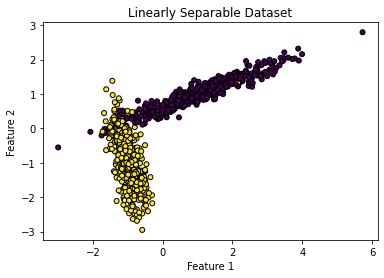

In [85]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

n_features = 2
n_samples = 1000
n_classes = 2

# Generate a linearly separable dataset
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=n_classes, class_sep=1.0)#, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

# 0.7 / 0.3 train-test random split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (700, 2)
X_test shape:  (300, 2)
y_train shape:  (700,)
y_test shape:  (300,)


In [87]:
from sklearn import preprocessing

#scaler
scaler = preprocessing.StandardScaler().fit(X_train)

#apply transformation to data
X_scaled = scaler.transform(X_train)

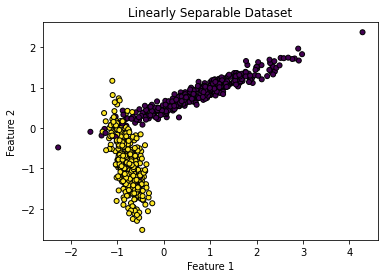

In [88]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.show()

In [95]:
from sklearn.svm import SVC

# Create a linear SVM classifier
#clf = SVC(kernel='linear')
clf = SVC(kernel='linear', gamma=0.1)  

# Train classifier
clf.fit(X_scaled, y_train)

# Predict test set labels
y_pred = clf.predict(scaler.transform(X_test))

from sklearn.metrics import accuracy_score

# Calculate accuracy train data

y_pred_train = clf.predict(X_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Accuracy (train): {:.2f}'.format(accuracy_train))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

#


Accuracy (train): 0.96
Accuracy: 0.99


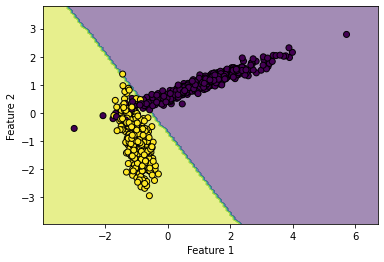

In [96]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
   clf, X_train, response_method="predict",
   xlabel="Feature 1", ylabel="Feature 2",
   alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")

### Make moons 

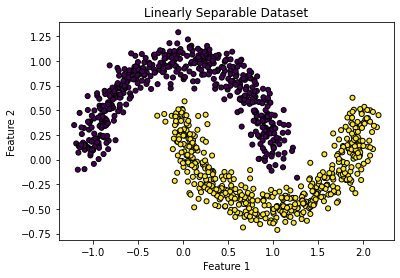

In [108]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

n_features = 2
n_samples = 1000

n_classes = 2

# Generate a linearly separable dataset
X, y = make_moons(n_samples=n_samples, noise=0.1)#, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.show()

In [109]:
from sklearn.model_selection import train_test_split

# 0.7 / 0.3 train-test random split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (700, 2)
X_test shape:  (300, 2)
y_train shape:  (700,)
y_test shape:  (300,)


In [110]:
from sklearn import preprocessing

#scaler
scaler = preprocessing.StandardScaler().fit(X_train)

#apply transformation to data
X_scaled = scaler.transform(X_train)

In [119]:
from sklearn.svm import SVC

# Create a linear SVM classifier
#clf = SVC(kernel='linear')
clf = SVC(kernel='poly', degree=3, gamma=0.1)  
#clf = SVC(kernel='rbf', gamma=0.1)  

# Train classifier
clf.fit(X_scaled, y_train)

# Predict test set labels
y_pred = clf.predict(scaler.transform(X_test))

from sklearn.metrics import accuracy_score

# Calculate accuracy train data

y_pred_train = clf.predict(X_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Accuracy (train): {:.2f}'.format(accuracy_train))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy (train): 0.87
Accuracy: 0.87


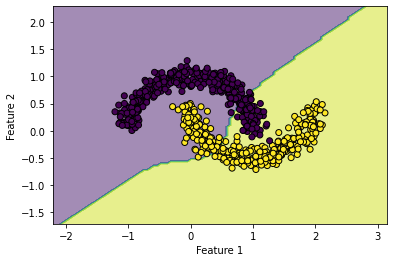

In [120]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
   clf, X_train, response_method="predict",
   xlabel="Feature 1", ylabel="Feature 2",
   alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")